<div align="center">
      <h1>Training the Multilayer Perceptron (MLP)</h1>
      <hr>
</div>

## Learning Objectives

In this notebook, we will focus on training a Multilayer Perceptron (MLP) model using the CIFAR-10 dataset, which is commonly used for image classification tasks. The primary objective is not just to train the model, but also to explore the impact of different hyperparameters on the training process and the model's performance.

You will experiment with various hyperparameters, such as the learning rate, number of hidden units, batch size, and number of epochs. Through these experiments, you’ll gain hands-on experience in observing how each hyperparameter influences the speed of convergence, the accuracy of the model, and its ability to generalize to new, unseen data.

By the end of this notebook, you should have a solid understanding of how tuning hyperparameters can significantly affect the performance of a neural network like the MLP, and how to optimize them for better results in image classification tasks.


In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'

%load_ext autoreload
%autoreload 2

CIFAR-10 dataset already exists


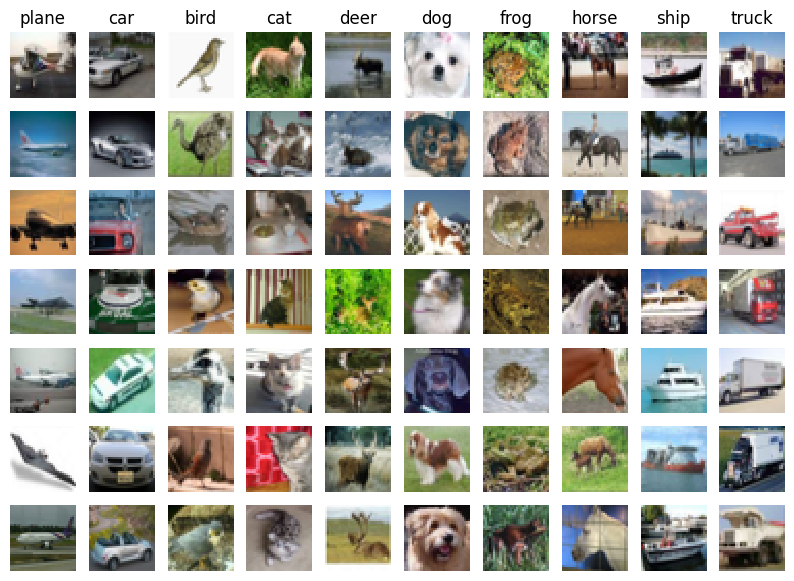

---------------- Training data ----------------
X_train shape: (45000, 32, 32, 3), y_train shape: (45000,)

---------------- Validation data ----------------
X_val shape: (5000, 32, 32, 3), y_val shape: (5000,)

---------------- Testing data ----------------
X_test shape: (10000, 32, 32, 3), y_test shape: (10000,)

---------------- Dataset info ----------------
Number of classes: 10
Number of features: 3072
Number of samples in dataset: 60000
Number of samples in training set: 45000, which is 75.00% of the dataset
Number of samples in validation set: 5000, which is 8.33% of the dataset
Number of samples in testing set: 10000, which is 16.67% of the dataset
arrays: torch.Size([45000, 3072])


In [2]:
import torch
from utils import load_cifar10, reshape_to_vectors, dataset_stats, normalize_torch

# download the CIFAR-10 dataset
cifar10_dir = './data/datasets/CIFAR10'
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
X_train, y_train, X_val, y_val, X_test, y_test = load_cifar10(cifar10_dir, visualize_samples=True)

# Print out the dataset statistics and visualize a few samples
num_features, num_classes, num_samples = dataset_stats(X_train, y_train, X_val, y_val, X_test, y_test, verbose=True)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()

X_val = torch.from_numpy(X_val).float()
y_val = torch.from_numpy(y_val).long()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

# Reshape the data to vectors and normalize them
X_train, X_val, X_test = reshape_to_vectors(X_train, X_val, X_test)
data = normalize_torch(X_train, X_val, X_test)
X_train, X_val, X_test = data['normalized_arrays']

## Training the MLP

This assignment is all about choosing the right hyperparameters for the MLP. You will have to experiment with different values for the hyperparameters and observe the effect on the training process. Your task is to achieve the highest possible accuracy on the test set. Don't worry about validation set for now, the validation and test set are the same in this assignment. 

The hyperparameters that you will have to experiment with are:

- `hidden_dim_1` **(Number of hidden units in the first hidden layer)**:
    This controls how many neurons or units are in the first hidden layer of your neural network. More units generally allow the model to capture more complex patterns but may lead to overfitting if set too high.

- `hidden_dim_2` **(Number of hidden units in the second hidden layer)**:
    Similar to hidden_dim_1, but it controls the number of neurons in the second hidden layer. If you have a deep network, adjusting this can impact how the model captures relationships across different features.

- `reg` **(Regularization strength)**:
    Regularization helps prevent overfitting by penalizing large weights. reg determines how strong the regularization is. Higher values make the penalty for large weights stronger, forcing the model to keep the weights smaller, which improves generalization at the cost of potential underfitting.

- `learning_rate` **(Learning rate)**:
    The learning rate controls how big the steps are when updating the model’s parameters during training. A smaller learning rate makes updates more gradual, which may help reach a more precise minimum, but training will be slower. A larger learning rate can make training faster but risks overshooting the optimal weights.

- `batch_size` **(Batch size)**:
    This refers to how many training examples are used in one iteration of the training loop before updating the model’s parameters. A smaller batch size leads to more frequent updates and can make training faster but noisier, while a larger batch size makes updates smoother but may require more memory.

- `num_iters` **(Number of iterations)**:
    The number of times the entire dataset (or mini-batches if using stochastic gradient descent) is passed through the network during training. More iterations allow the model to learn better, but too many can lead to overfitting. This also depends on the learning rate and convergence behavior.

Now it's time to initialize these hyperparameters that are in the following cell. 

In [3]:
# Hyperparameters for the MLP
# TODO: Change the hyperparameters and train the neural network
hidden_dim_1 = None  # the number of hidden units in the first hidden layer (int)
hidden_dim_2 = None  # the number of hidden units in the second hidden layer (int)
reg = None  # the regularization strength (float)
learning_rate = None  # the learning rate (float)
batch_size = None  # the batch size (int)
num_iters = None  # the number of iterations (int)

Training: 100%|██████████| 20000/20000 [00:47<00:00, 419.57it/s]


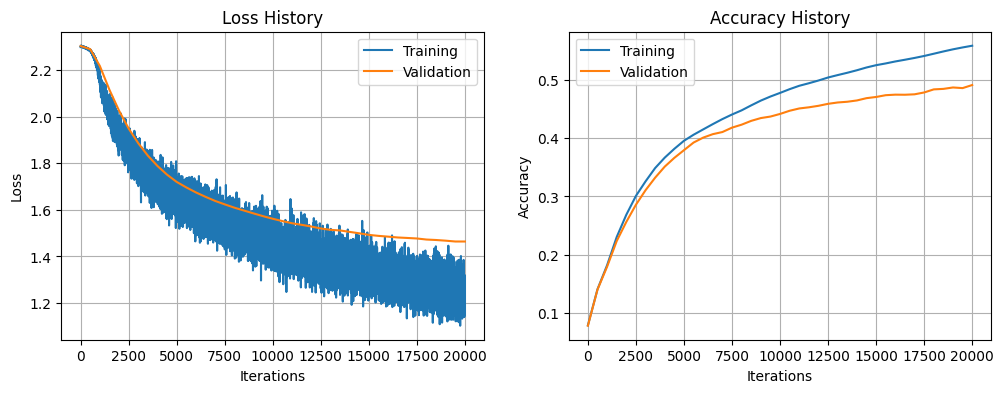

In [4]:
import torch

from utils import plot_training
from assignments import MLPClassifier

torch.random.manual_seed(69)

# Train the MLP with ReLU activation function
mlp_relu = MLPClassifier(num_features, 
                         hidden_dim_1, 
                         hidden_dim_2, 
                         num_classes, 
                         reg=reg,
                         learning_rate=learning_rate,
                         batch_size=batch_size,
                         num_iters=num_iters)
relu_loss_history, relu_acc_history = mlp_relu.train(X_train, y_train, X_val, y_val)

# Plot the training loss and accuracy and visualize the decision boundaries
plot_training(relu_loss_history, relu_acc_history, ema=True, alpha=0.5)

## Training Summary

Share a brief summary of your training results. Discuss the hyperparameters you experimented with and their impact on the training process. Highlight the highest accuracy you attained and the ultimate accuracy on the test and training sets. Ensure to include visuals showcasing (images) a suboptimal training process and the most successful training process you accomplished. Elaborate on the distinctions between these two training scenarios.